<a href="https://colab.research.google.com/github/tri-mgt/loan_approval_classification/blob/main/loan_prediction_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Predicting Property Loan Approval with Machine Learning**

###Objective
> Predict whether one is approved for property loan based on various factors (features)

###Data
> The dataset is from Kaggle.com
[Loan Status Prediction](https://www.kaggle.com/datasets/bhavikjikadara/loan-status-prediction)

###Features
* Loan_ID: A unique loan ID.
* Gender: Either male or female.
* Married: Weather Married(yes) or Not Marttied(No).
* Dependents: Number of persons depending on the client.
* Education: Applicant Education(Graduate or Undergraduate).
* Self_Employed: Self-employed (Yes/No).
* ApplicantIncome: Applicant income.
* CoapplicantIncome: Co-applicant income.
* LoanAmount: Loan amount in thousands.
* Loan_Amount_Term: Terms of the loan in months.
* Credit_History: Credit history meets guidelines.
* Property_Area: Applicants are living either Urban, Semi-Urban or Rural.
* **Loan_Status:** Loan approved (Y/N).

###Evaluation
> Aim for atleast 80% accuracy for the best performning classification model.  



Import libraries

In [1]:
# EDA and plotting libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# scikit-learn models
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler, LabelEncoder

# metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import precision_score, accuracy_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# model evaluation
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV

sns.set()

In [2]:
# load dataset
df = pd.read_csv('loan_data.csv')

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
1,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
2,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
3,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
4,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381 entries, 0 to 380
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            381 non-null    object 
 1   Gender             376 non-null    object 
 2   Married            381 non-null    object 
 3   Dependents         373 non-null    object 
 4   Education          381 non-null    object 
 5   Self_Employed      360 non-null    object 
 6   ApplicantIncome    381 non-null    int64  
 7   CoapplicantIncome  381 non-null    float64
 8   LoanAmount         381 non-null    float64
 9   Loan_Amount_Term   370 non-null    float64
 10  Credit_History     351 non-null    float64
 11  Property_Area      381 non-null    object 
 12  Loan_Status        381 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 38.8+ KB


In [5]:
# descriptive statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ApplicantIncome,381.0,3579.845144,1419.813818,150.0,2600.0,3333.0,4288.0,9703.0
CoapplicantIncome,381.0,1277.275381,2340.818114,0.0,0.0,983.0,2016.0,33837.0
LoanAmount,381.0,104.986877,28.358464,9.0,90.0,110.0,127.0,150.0
Loan_Amount_Term,370.0,340.864865,68.549257,12.0,360.0,360.0,360.0,480.0
Credit_History,351.0,0.837607,0.369338,0.0,1.0,1.0,1.0,1.0


In [6]:
# Check missing values
df.isnull().sum()

Loan_ID               0
Gender                5
Married               0
Dependents            8
Education             0
Self_Employed        21
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            0
Loan_Amount_Term     11
Credit_History       30
Property_Area         0
Loan_Status           0
dtype: int64

## Fill missing values

In [7]:
# Drop Gender, Dependents, and Loan ID
df.drop(columns=['Loan_ID'], inplace=True)
df.dropna(subset=['Gender', 'Dependents'], inplace=True)

# Dependents col is in categorical it should be numerical
df['Dependents'] = df['Dependents'].replace(['0', '1', '2', '3+'], [0, 1, 2, 3])

 # Fill missing values for Loan amount term, credit history, an self employed
df['Loan_Amount_Term'] = df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mean())
df['Credit_History'] = df['Credit_History'].fillna(df['Credit_History'].mode()[0])
df['Self_Employed'] = df['Self_Employed'].fillna(df['Self_Employed'].mode()[0])

## Convert categorical to numerical

In [8]:
# First rename Loan_Status to target
df = df.rename(columns={'Loan_Status': 'target'})

In [9]:
# LabelEncoder to transform cat to 0 or 1
df = df.apply(LabelEncoder().fit_transform)

In [10]:
df.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,target
0,1,1,1,0,0,243,48,79,9,1,0,0
1,1,1,0,0,1,113,0,26,9,1,2,1
2,1,1,0,1,0,75,122,71,9,1,2,1
3,1,0,0,0,0,287,0,92,9,1,2,1
4,1,1,0,1,0,56,49,46,9,1,2,1


In [11]:
# Check missing values again
df.isnull().sum().sum()

0

## Data Exploration

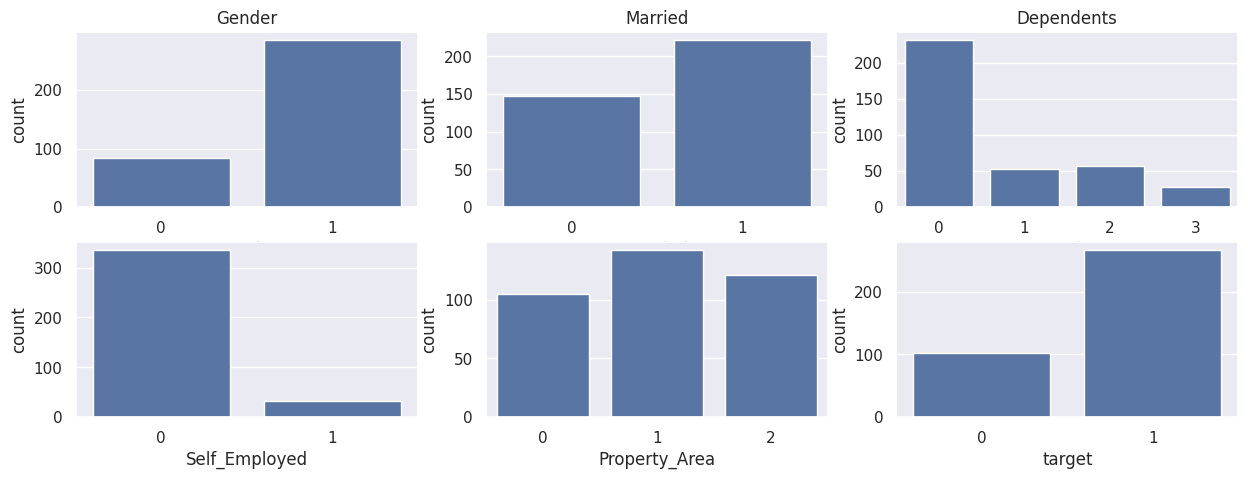

In [12]:
fig, ax = plt.subplots(2, 3, figsize=(15, 5))

# Gender count
sns.countplot(x='Gender', data=df, ax=ax[0][0])
ax[0][0].set_title('Gender')

# Married count
sns.countplot(x='Married', data=df, ax=ax[0][1])
ax[0][1].set_title('Married')

# Dependents
sns.countplot(x='Dependents', data=df, ax=ax[0][2])
ax[0][2].set_title('Dependents')

# Self employed
sns.countplot(x='Self_Employed', data=df, ax=ax[1][0])

# Property Area
sns.countplot(x='Property_Area', data=df, ax=ax[1][1])

# Target
sns.countplot(x='target', data=df, ax=ax[1][2])

plt.show()

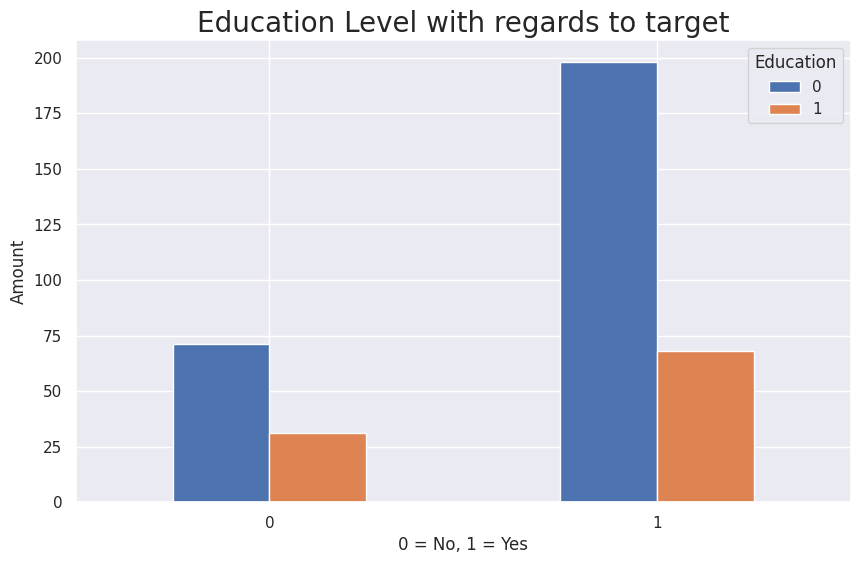

In [13]:
# Plot Education vs loan approve/or not
pd.crosstab( df.target, df['Education']).plot(kind='bar', figsize=(10, 6))

plt.title('Education Level with regards to target', fontsize=20)
plt.xlabel('0 = No, 1 = Yes')
plt.ylabel('Amount')
plt.xticks(rotation=0);

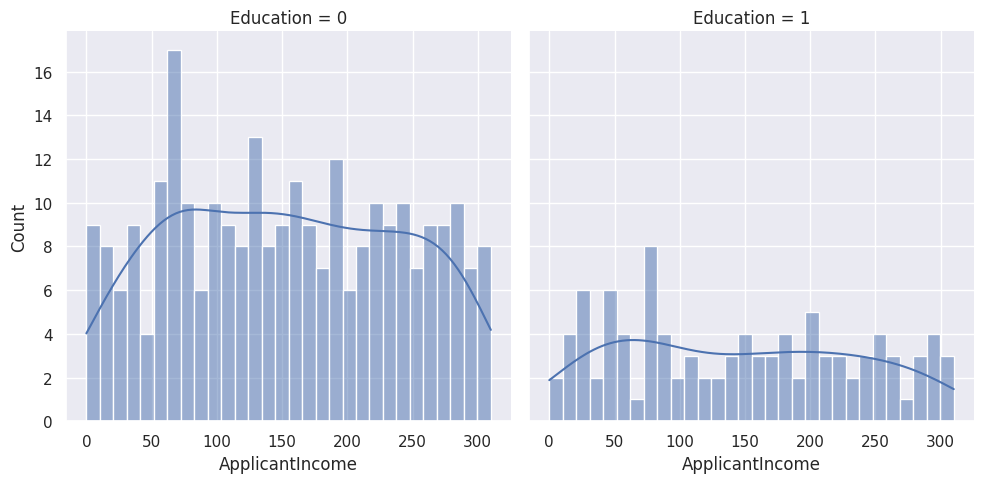

In [14]:
# Distriubtion of applicant income vs. education
sns.displot(df, x='ApplicantIncome', col='Education', kde=True, bins=30);

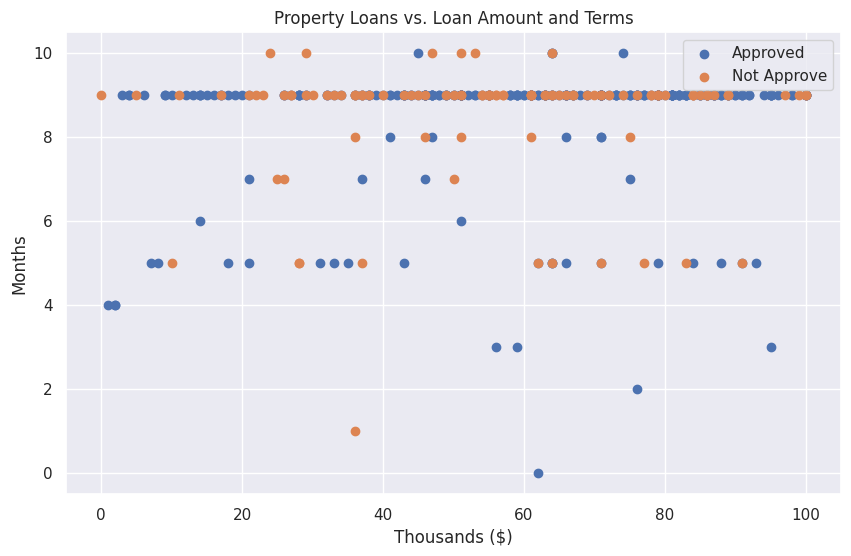

In [15]:
# Plot loan amount and terms (months)
plt.figure(figsize=(10, 6))

plt.scatter(df['LoanAmount'][df['target']==1],
            df['Loan_Amount_Term'][df['target']==1])

plt.scatter(df['LoanAmount'][df['target']==0],
            df['Loan_Amount_Term'][df['target']==0])


plt.title('Property Loans vs. Loan Amount and Terms')
plt.xlabel('Thousands ($)')
plt.ylabel('Months')
plt.legend(['Approved', 'Not Approve']);

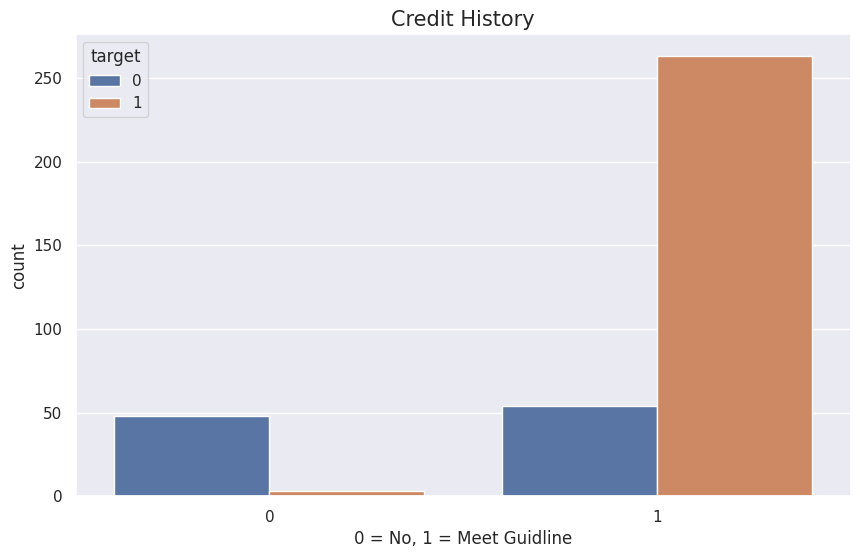

In [16]:
# Credit history distriubtion
plt.figure(figsize=(10,6))

sns.countplot(df, x='Credit_History', hue='target');
plt.title('Credit History', fontsize=15)
plt.xlabel('0 = No, 1 = Meet Guidline');

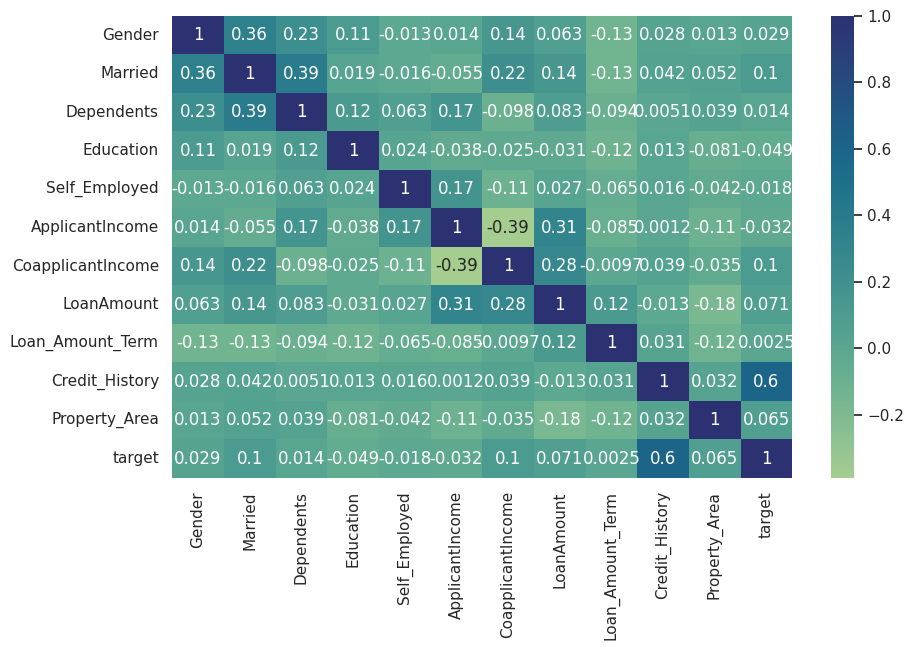

In [17]:
# Correlation
corr_mat = df.corr()

# visualize
fig, ax= plt.subplots(figsize=(10, 6))
ax = sns.heatmap(corr_mat, annot=True, cmap='crest');

## Modelling

1. Logistic Regression
2. KNN
3. Random Forest Classifier
4. Naive Bayes
5. Support Vector Machine (SVC)

In [18]:
# setup random seed
np.random.seed(23)

# create x and y
X = df.drop('target', axis=1)
y = df.target

# split into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [93]:
# scale X_train and X_test
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.fit_transform(X_test)

In [94]:
# create models in a dictionary

models = {
    'Logistic': LogisticRegression(max_iter=1000),
    'KNN': KNeighborsClassifier(),
    'RandomForest': RandomForestClassifier(),
    'Naive bayes': GaussianNB(),
    'SVM': SVC()
}


# get fit and score for each model

def fit_score(models, X_train, X_test, y_train, y_test):
  np.random.seed(23)

  # store scores
  model_score = {}

  for name, model in models.items():
    model.fit(X_train, y_train)

    # store it in model_scores dict
    model_score[name] = model.score(X_test, y_test)

  return model_score


# call it
model_scores = fit_score(models, X_train, X_test, y_train, y_test)

print('Baseline')
model_scores

Baseline


{'Logistic': 0.8783783783783784,
 'KNN': 0.8378378378378378,
 'RandomForest': 0.8648648648648649,
 'Naive bayes': 0.8648648648648649,
 'SVM': 0.8783783783783784}

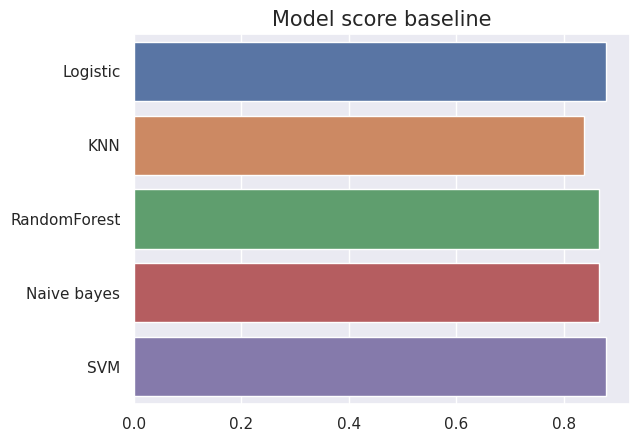

In [95]:
# visualize baseline model
model_visual = pd.DataFrame(model_scores, index=['accuarcy'])
sns.barplot(model_visual, orient='h')
plt.title('Model score baseline', fontsize=15);

## Hyperparameter tuning with RandomizedSearchCV

In [96]:
# create grid

# logistic regression
log_grid = {'C': np.arange(0, 1, 0.1),
            'solver': ['liblinear', 'lbfgs', 'saga']}

# KNeighbors
knn_grid = {'n_neighbors': np.arange(1, 21, 1)}

# random forest
rf_grid = {'n_estimators': np.arange(5, 101, 5),
           'max_depth': [None, 2, 3, 4, 50, 100],
           'min_samples_split': np.arange(2, 21, 1),
           'min_samples_leaf': np.arange(1, 21, 1)}

# svm
svm_grid = {'kernel': ['poly', 'sigmoid', 'linear', 'rbf'],
            'C': np.logspace(-3, 1, 1),
            'gamma': ['scale', 'auto']}


In [97]:
# fit and tune models
models_tune = {
    'logistic': (LogisticRegression(max_iter=1000), log_grid),
    'KNN': (KNeighborsClassifier(), knn_grid),
    'Random Forest': (RandomForestClassifier(), rf_grid)
    #'SVM': (SVC(), svm_grid)
}

# fit and socre
def fit_tune_model(models, X_train, X_test, y_train, y_test):
  np.random.seed(23)

  # store new tune models
  tune_models = {}

  for name, (model, param_grids) in models.items():
    randomSearch = RandomizedSearchCV(estimator=model,
                                      param_distributions=param_grids,
                                      cv=5,
                                      verbose=True)
    # fit the models
    randomSearch.fit(X_train, y_train)

    # add it to the dict

    print(f'New tune score {name}: {randomSearch.score(X_test, y_test)}')
    print(f'best parameters: {name} : {randomSearch.best_params_}')

    tune_models[name] = randomSearch

  return tune_models

In [98]:
model_tune_fit = fit_tune_model(models=models_tune,
                                X_train=X_train,
                                X_test=X_test,
                                y_train=y_train,
                                y_test=y_test)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
New tune score logistic: 0.8783783783783784
best parameters: logistic : {'solver': 'lbfgs', 'C': 0.5}
Fitting 5 folds for each of 10 candidates, totalling 50 fits


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
5 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
5 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py", line 1160, in fit
    self._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 600, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/

New tune score KNN: 0.8648648648648649
best parameters: KNN : {'n_neighbors': 9}
Fitting 5 folds for each of 10 candidates, totalling 50 fits
New tune score Random Forest: 0.8783783783783784
best parameters: Random Forest : {'n_estimators': 65, 'min_samples_split': 4, 'min_samples_leaf': 10, 'max_depth': 4}


In [99]:
model_scores

{'Logistic': 0.8783783783783784,
 'KNN': 0.8378378378378378,
 'RandomForest': 0.8648648648648649,
 'Naive bayes': 0.8648648648648649,
 'SVM': 0.8783783783783784}

* Logistic Regression remained the same
* KNN improved
* RF improved

## Tunning with GridSearchCV

* LogisticRegression
* RandomForestClassifier
* Naive Bayes

In [100]:
# grid parameter using best param from RandomizedSearchCV

# logisitc
log_gs = {
      'C': np.logspace(-4, 5, 20),
      'solver': ['liblinear', 'lbfgs']}

# random forest
rf_gs = {
     'n_estimators': [10, 100, 200],
     'min_samples_split': [4, 5],
     'min_samples_leaf': [5, 10],
     'max_depth': [None, 4, 6],
     'bootstrap': [True, False]}

# bayes
nb_gs = {
    'var_smoothing': np.logspace(-0.9, 100)}

In [101]:
#logistic gridsearch
logistic_gs = GridSearchCV(LogisticRegression(max_iter=1000),
                           param_grid=log_gs,
                           cv=5,
                           verbose=True)

logistic_gs.fit(X_train, y_train)
print(logistic_gs.best_params_)
print()
print(logistic_gs.score(X_test, y_test))

Fitting 5 folds for each of 40 candidates, totalling 200 fits
{'C': 0.0001, 'solver': 'liblinear'}

0.8783783783783784


In [102]:
# randomforest
randfor_gs = GridSearchCV(RandomForestClassifier(),
                           param_grid=rf_gs,
                           cv=5,
                           verbose=True)

randfor_gs.fit(X_train, y_train)
print(randfor_gs.best_params_)
print()
print(randfor_gs.score(X_test, y_test))

Fitting 5 folds for each of 72 candidates, totalling 360 fits
{'bootstrap': False, 'max_depth': None, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 10}

0.8648648648648649


In [103]:
bayes_gs = GridSearchCV(GaussianNB(),
                           param_grid=nb_gs,
                           cv=5,
                           verbose=True)

bayes_gs.fit(X_train, y_train)
print(bayes_gs.best_params_)
print()
print(bayes_gs.score(X_test, y_test))

Fitting 5 folds for each of 50 candidates, totalling 250 fits
{'var_smoothing': 0.12589254117941673}

0.8648648648648649


## Evaluate

In [104]:
# predict logistic and bayes
y_preds_log = logistic_gs.predict(X_test)
y_preds_bayes = bayes_gs.predict(X_test)
y_preds_rf = randfor_gs.predict(X_test)

In [105]:
print(y_preds_log)

[1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [106]:
print(y_preds_bayes)

[1 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [107]:
print(y_preds_rf)

[1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [108]:
def roc_graph(estimator, X_test, y_test):
  return RocCurveDisplay.from_estimator(estimator=estimator, X=X_test, y=y_test)

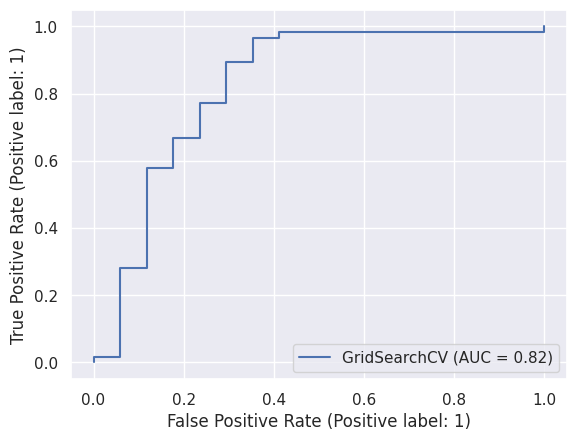

In [109]:
# plot roc curve
roc_graph(logistic_gs, X_test,y_test);

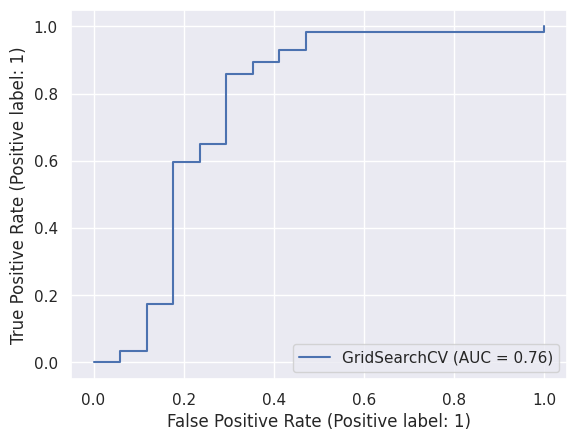

In [112]:
# bayes
roc_graph(bayes_gs, X_test, y_test);

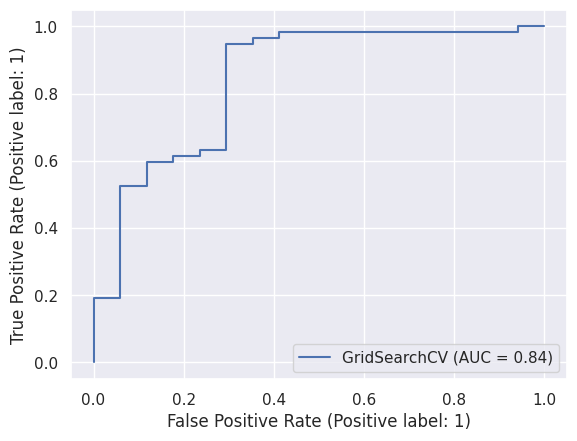

In [111]:
# random forest
roc_graph(randfor_gs, X_test, y_test);

In [113]:
# confusion matrix

print('Logistic Regression')
print(confusion_matrix(y_test, y_preds_log))
print()
print('Naive Bayes')
print(confusion_matrix(y_test, y_preds_bayes))
print()
print('Random Forest Classifier')
print(confusion_matrix(y_test, y_preds_rf))

Logistic Regression
[[ 9  8]
 [ 1 56]]

Naive Bayes
[[ 9  8]
 [ 2 55]]

Random Forest Classifier
[[ 8  9]
 [ 1 56]]


<Axes: >

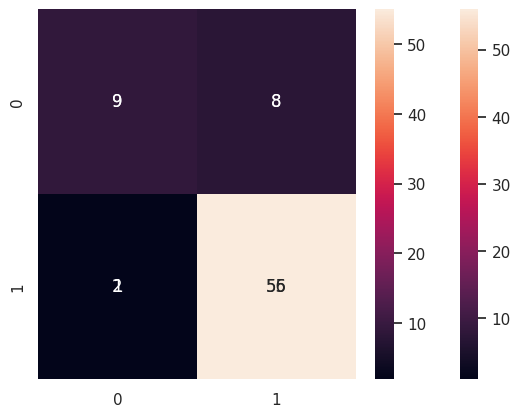

In [114]:
# visualize logistic regression
sns.heatmap(confusion_matrix(y_test, y_preds_log), annot=True)
plt.xlabel('True')
plt.ylabel('predicted');
sns.heatmap(confusion_matrix(y_test, y_preds_bayes), annot=True)


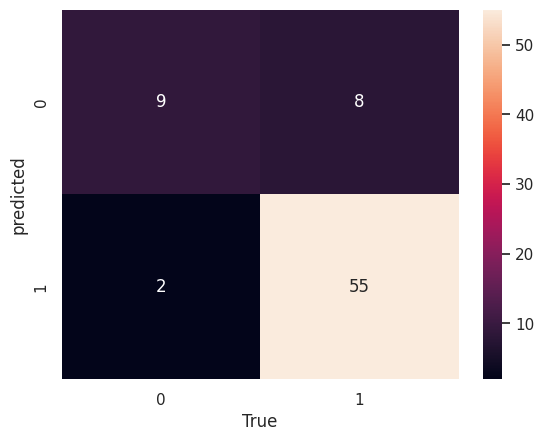

In [115]:
# visulize naive bayes confusion matrix
sns.heatmap(confusion_matrix(y_test, y_preds_bayes), annot=True)
plt.xlabel('True')
plt.ylabel('predicted');

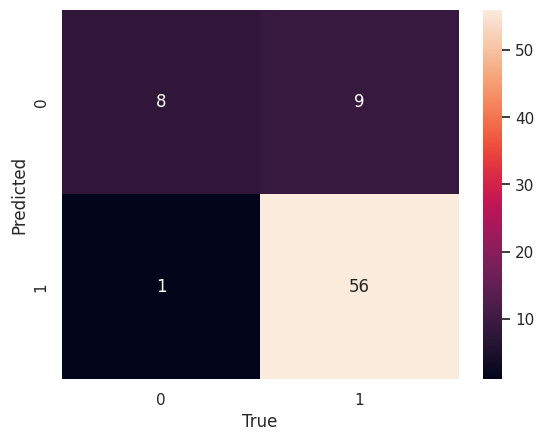

In [117]:
# visualize random forest
sns.heatmap(confusion_matrix(y_test, y_preds_rf), annot=True)
plt.xlabel('True')
plt.ylabel('Predicted');

## View classification report

In [118]:
# logistic regression
print(classification_report(y_test, y_preds_log))

              precision    recall  f1-score   support

           0       0.90      0.53      0.67        17
           1       0.88      0.98      0.93        57

    accuracy                           0.88        74
   macro avg       0.89      0.76      0.80        74
weighted avg       0.88      0.88      0.87        74



In [119]:
# bayes
print(classification_report(y_test, y_preds_bayes, zero_division=0))

              precision    recall  f1-score   support

           0       0.82      0.53      0.64        17
           1       0.87      0.96      0.92        57

    accuracy                           0.86        74
   macro avg       0.85      0.75      0.78        74
weighted avg       0.86      0.86      0.85        74



In [120]:
# random forest
print(classification_report(y_test, y_preds_rf))

              precision    recall  f1-score   support

           0       0.89      0.47      0.62        17
           1       0.86      0.98      0.92        57

    accuracy                           0.86        74
   macro avg       0.88      0.73      0.77        74
weighted avg       0.87      0.86      0.85        74



## Cross-validation
* Logistic Regression
* Bayes

In [129]:
# bayes
gauss = GaussianNB(var_smoothing=0.12589254117941673)

# logistic
loglog = LogisticRegression(C=0.615848211066026, solver='liblinear')

# rf
randomforest = RandomForestClassifier(max_depth=None, min_samples_leaf=10, min_samples_split=5, n_estimators=10)

def cross_val(clf, X, y):
  np.random.seed(0)
  scores = {}

  scores['accuracy'] = np.mean(cross_val_score(clf, X, y, cv=55, scoring='accuracy'))
  scores['recall'] = np.mean(cross_val_score(clf, X, y, cv=5, scoring='recall'))
  scores['precision'] = np.mean(cross_val_score(clf, X, y, cv=5, scoring='precision'))
  scores['f1'] = np.mean(cross_val_score(clf, X, y, cv=5, scoring='f1'))

  return scores

eval1 = cross_val(gauss, X, y)
eval2 = cross_val(loglog, X, y)
eval3 = cross_val(randomforest, X, y)

In [125]:
# bayes
for name, score in eval1.items():
  print(f'{name.capitalize()}: {score*100:.2f}%')

Accuracy: 72.38%
Recall: 100.00%
Precision: 72.28%
F1: 83.91%


In [126]:
# logistic
for name, score in eval2.items():
  print(f'{name.capitalize()}: {score*100:.2f}%')

Accuracy: 84.63%
Recall: 98.12%
Precision: 82.68%
F1: 89.71%


In [127]:
# rf
for name, score in eval3.items():
  print(f'{name.capitalize()}: {score*100:.2f}%')

Accuracy: 83.46%
Recall: 98.87%
Precision: 82.51%
F1: 90.44%


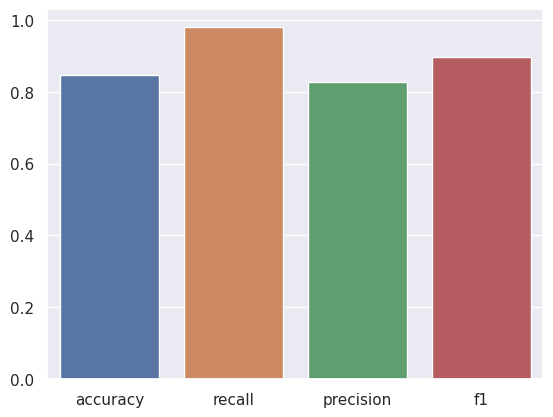

In [128]:
# visualize it
cross_log = pd.DataFrame(eval2, index=['accuracy'])
sns.barplot(cross_log);